<a href="https://colab.research.google.com/github/Aydino/carbon/blob/main/Carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carbon analysis. 

# DATA DESCRIPTIVE ANALYSIS

First import libraries

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from IPython.display import display, HTML
from sklearn.metrics import r2_score


**Import** **data** 

In [130]:
df = pd.read_csv("Data.csv")
# To display the top 5 rows 
df.head(5)  

,BLDG_PUBID,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,BLDG_STOR_A,$BLDG_STOR_A,LCA_YEAR,LCA_REFPERIOD,LCA_SOUR_CODE,LCA_STAGES,LCA_BLDG_SCOPE,LCA_MAT_Q,EC_WB_EX_OPER,EC_LCAA_PERM2,Average_Area_m2,Average_Storey
0,A00,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",0,More than 25,2016.0,40.0,41.0,AB,SF,Y,2567.39,2521.63,70000.0,35.0
1,A00,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",0,7 to 14,2016.0,40.0,41.0,AB,SF,Y,1699.34,1332.55,70000.0,11.0
2,A00,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",0,More than 25,2016.0,40.0,41.0,AB,SF,Y,1303.39,1031.76,70000.0,35.0
3,A00,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",0,1 to 6,2016.0,40.0,41.0,AB,SF,Y,1211.33,938.69,1600.0,4.0
4,A00,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,0,15 to 25,2016.0,40.0,41.0,AB,SF,Y,1087.86,937.59,120000.0,20.0


Checking the types of data

In [131]:
df.dtypes

BLDG_PUBID          object
BLDG_TYP            object
BLDG_US             object
BLDG_LOC_REGION     object
BLDG_NEW_REN        object
$BLDG_AREA_M2       object
$BLDG_AREA_FT2      object
BLDG_STOR_A          int64
$BLDG_STOR_A        object
LCA_YEAR           float64
LCA_REFPERIOD      float64
LCA_SOUR_CODE      float64
LCA_STAGES          object
LCA_BLDG_SCOPE      object
LCA_MAT_Q           object
EC_WB_EX_OPER      float64
EC_LCAA_PERM2      float64
Average_Area_m2    float64
Average_Storey     float64
dtype: object

**Dropping irrelevant columns**

In [132]:
df=df.drop(['BLDG_PUBID','BLDG_STOR_A','LCA_YEAR','LCA_REFPERIOD','LCA_SOUR_CODE','LCA_STAGES','LCA_BLDG_SCOPE','LCA_MAT_Q','$BLDG_AREA_FT2' ],axis=1)
df.head(5)


,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2,Average_Area_m2,Average_Storey
0,Commercial,Mixed use,Middle East,New,46452 to 92903,More than 25,2567.39,2521.63,70000.0,35.0
1,Commercial,Other,North America,New,46452 to 92903,7 to 14,1699.34,1332.55,70000.0,11.0
2,Commercial,Office,Europe,New,46452 to 92903,More than 25,1303.39,1031.76,70000.0,35.0
3,Commercial,Other,North America,New,930 to 2323,1 to 6,1211.33,938.69,1600.0,4.0
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,1087.86,937.59,120000.0,20.0


In [133]:
df.shape

(1191, 10)

**Dublicate Check**

In [134]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (58, 10)


Drop Dublicates

In [135]:
df = df.drop_duplicates()
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2,Average_Area_m2,Average_Storey
0,Commercial,Mixed use,Middle East,New,46452 to 92903,More than 25,2567.39,2521.63,70000.0,35.0
1,Commercial,Other,North America,New,46452 to 92903,7 to 14,1699.34,1332.55,70000.0,11.0
2,Commercial,Office,Europe,New,46452 to 92903,More than 25,1303.39,1031.76,70000.0,35.0
3,Commercial,Other,North America,New,930 to 2323,1 to 6,1211.33,938.69,1600.0,4.0
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,1087.86,937.59,120000.0,20.0


In [136]:
df.count()

BLDG_TYP           1120
BLDG_US            1119
BLDG_LOC_REGION    1002
BLDG_NEW_REN       1117
$BLDG_AREA_M2      1131
$BLDG_STOR_A       1070
EC_WB_EX_OPER      1124
EC_LCAA_PERM2       988
Average_Area_m2    1131
Average_Storey     1070
dtype: int64

Dropping the missing or null values.

In [137]:
print(df.isnull().sum())

BLDG_TYP            13
BLDG_US             14
BLDG_LOC_REGION    131
BLDG_NEW_REN        16
$BLDG_AREA_M2        2
$BLDG_STOR_A        63
EC_WB_EX_OPER        9
EC_LCAA_PERM2      145
Average_Area_m2      2
Average_Storey      63
dtype: int64


In [138]:
df = df.dropna()    # Dropping the missing values and zeros
df.count()

BLDG_TYP           840
BLDG_US            840
BLDG_LOC_REGION    840
BLDG_NEW_REN       840
$BLDG_AREA_M2      840
$BLDG_STOR_A       840
EC_WB_EX_OPER      840
EC_LCAA_PERM2      840
Average_Area_m2    840
Average_Storey     840
dtype: int64

In [139]:
print(df.isnull().sum())   # After dropping the values

BLDG_TYP           0
BLDG_US            0
BLDG_LOC_REGION    0
BLDG_NEW_REN       0
$BLDG_AREA_M2      0
$BLDG_STOR_A       0
EC_WB_EX_OPER      0
EC_LCAA_PERM2      0
Average_Area_m2    0
Average_Storey     0
dtype: int64


**Detecting Outliers**

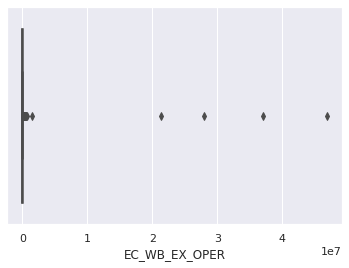

In [140]:
sns.boxplot(x=df['EC_WB_EX_OPER'])

In [141]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EC_WB_EX_OPER      21576.9575
EC_LCAA_PERM2        286.3400
Average_Area_m2    66500.0000
Average_Storey        16.0000
dtype: float64


Outliers elimination

In [142]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(673, 10)

**Change Column Names **

In [143]:
df = df.rename(columns={'$BLDG_AREA_M2':'BLDG_AREA_M2','$BLDG_AREA_FT2':'BLDG_AREA_FT2','$BLDG_STOR_A':'BLDG_STOR_A'})
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,BLDG_AREA_M2,BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2,Average_Area_m2,Average_Storey
3,Commercial,Other,North America,New,930 to 2323,1 to 6,1211.33,938.69,1600.0,4.0
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,1087.86,937.59,120000.0,20.0
5,Commercial,Office,Asia-Pacific,New,46452 to 92903,1 to 6,992.27,923.30,70000.0,4.0
6,Commercial,Other,North America,New,18581 to 46451,1 to 6,1185.57,917.93,35000.0,4.0
7,Commercial,Other,North America,New,18581 to 46451,1 to 6,1140.08,882.65,35000.0,4.0


Histogram---------

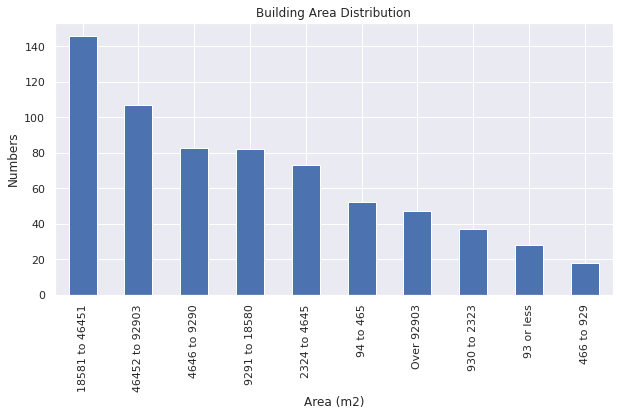

In [144]:
df.BLDG_AREA_M2.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Area Distribution")
plt.ylabel('Numbers')
plt.xlabel('Area (m2)');

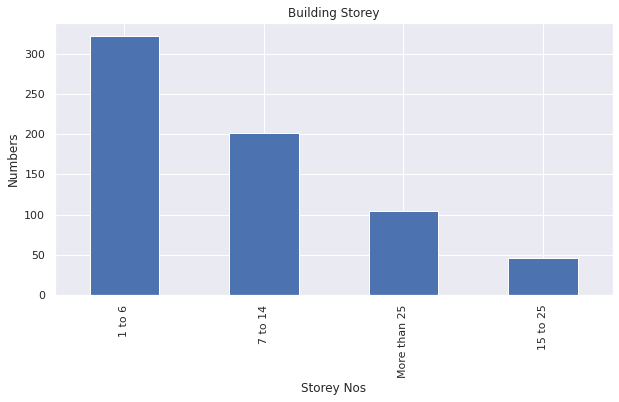

In [145]:
df.BLDG_STOR_A.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Storey")
plt.ylabel('Numbers')
plt.xlabel('Storey Nos');

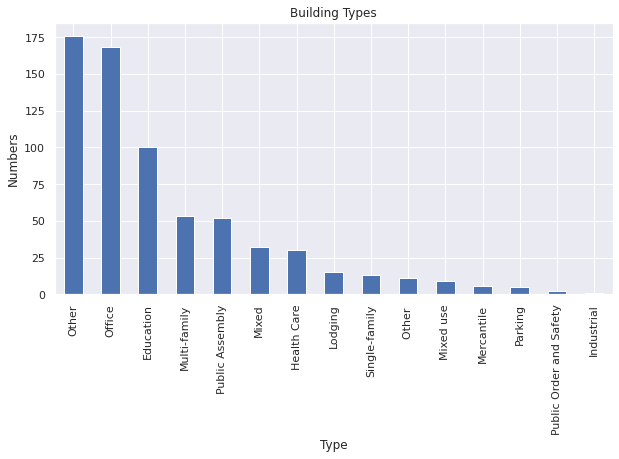

In [146]:
df.BLDG_US.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Types")
plt.ylabel('Numbers')
plt.xlabel('Type');

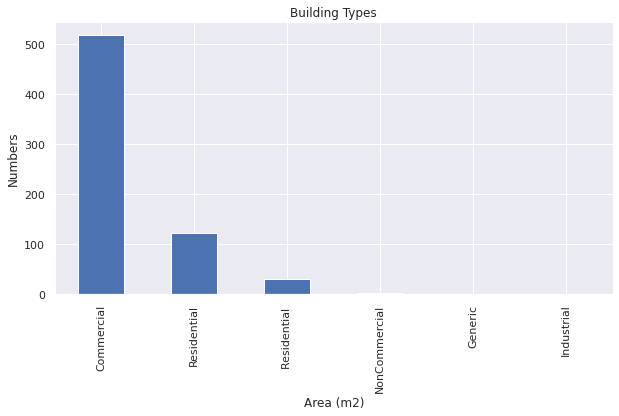

In [147]:
df.BLDG_TYP.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Types")
plt.ylabel('Numbers')
plt.xlabel('Area (m2)');

Let's check corr betweeen total carbon and unit carbon.

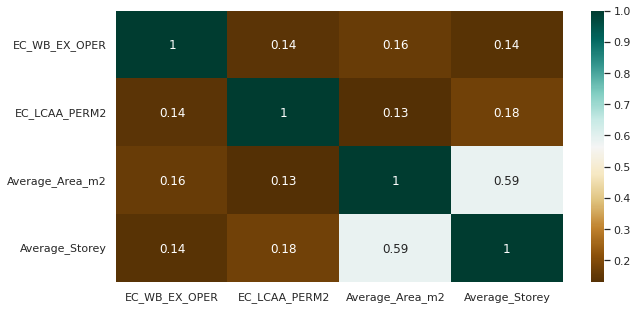

In [148]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

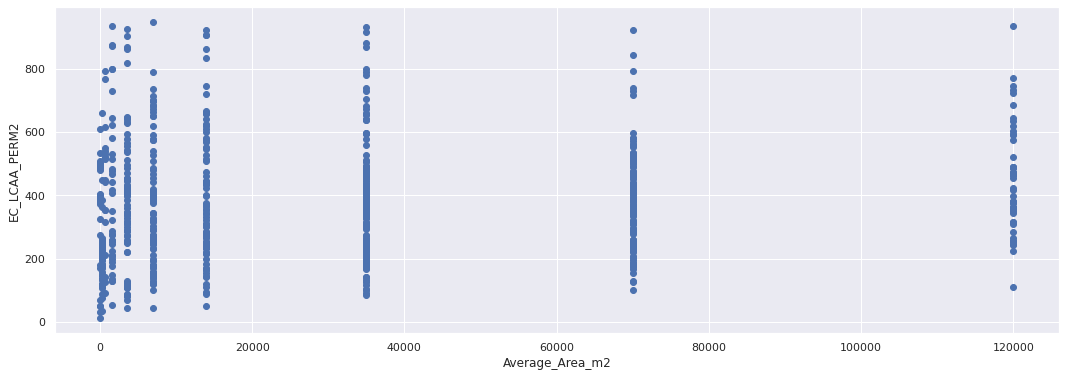

In [149]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['Average_Area_m2'], df['EC_LCAA_PERM2'])
ax.set_xlabel('Average_Area_m2')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

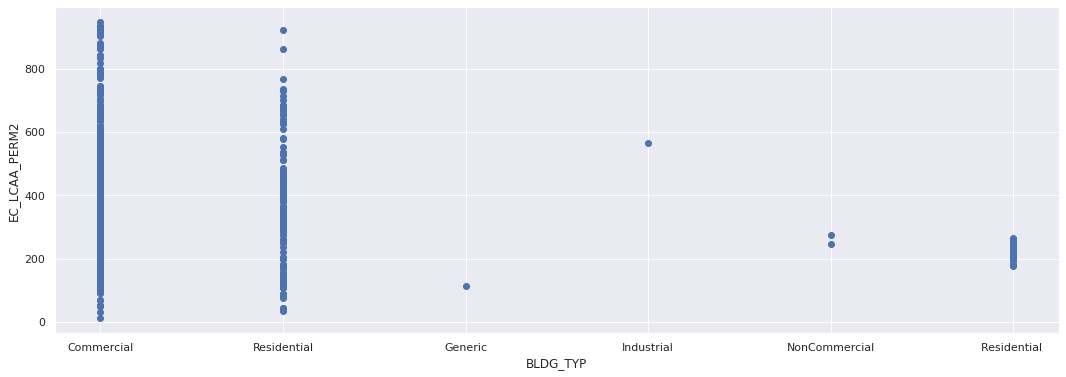

In [150]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_TYP'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_TYP')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

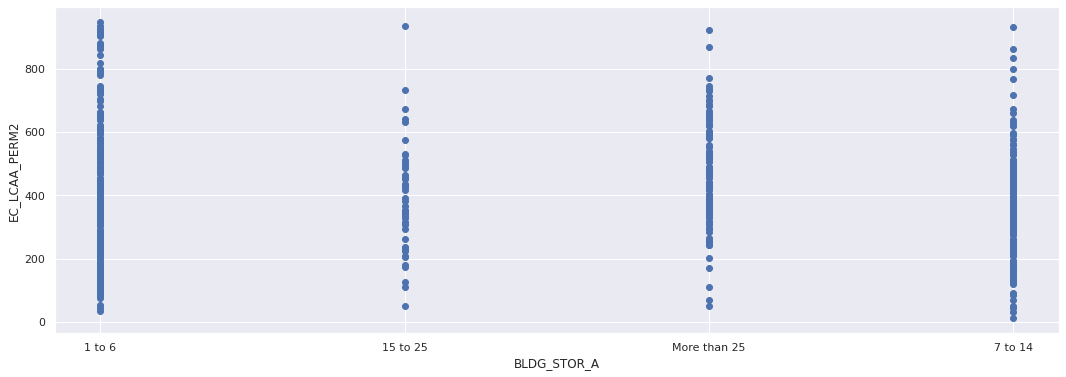

In [151]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_STOR_A'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_STOR_A')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

Statistical data of the data frame

In [152]:
df['EC_LCAA_PERM2'].describe()

count    673.000000
mean     374.075245
std      192.614461
min       10.000000
25%      230.000000
50%      352.000000
75%      485.000000
max      950.000000
Name: EC_LCAA_PERM2, dtype: float64

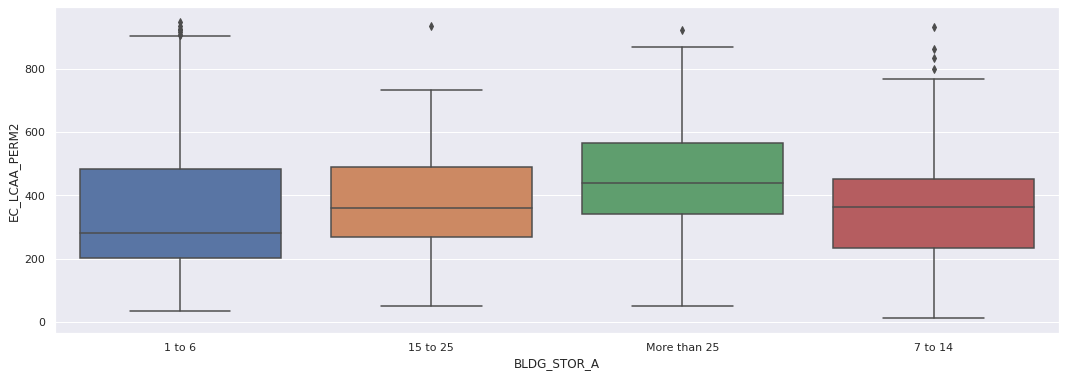

In [153]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='BLDG_STOR_A', y='EC_LCAA_PERM2', data=df, orient="v")

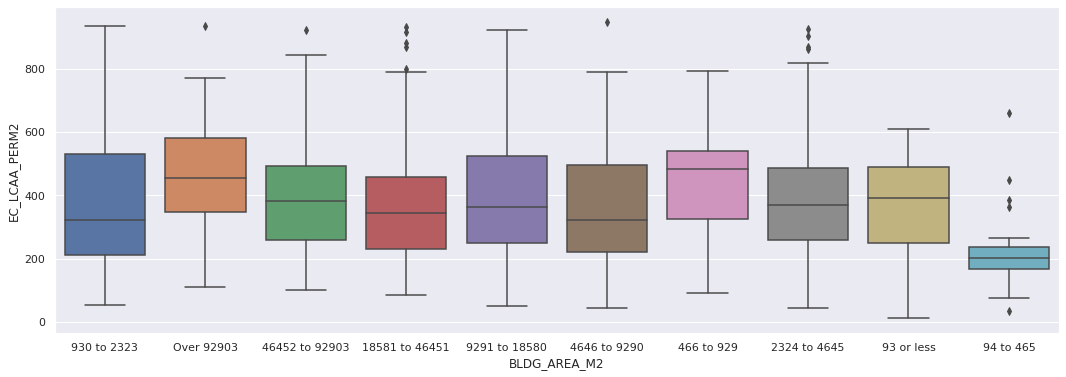

In [154]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='BLDG_AREA_M2', y='EC_LCAA_PERM2', data=df, orient="v")

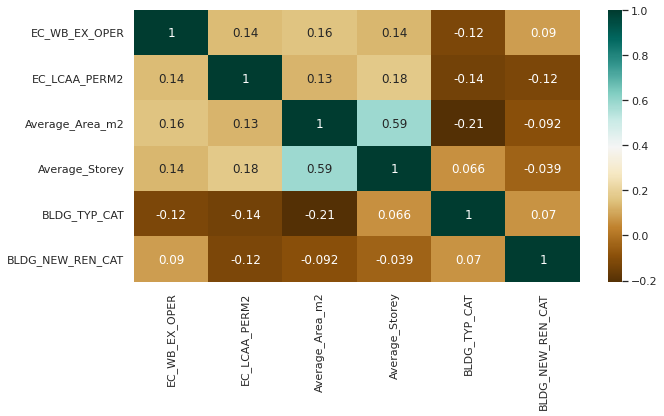

In [155]:
df['BLDG_TYP_CAT']=df['BLDG_TYP'].astype('category').cat.codes
df['BLDG_NEW_REN_CAT']=df['BLDG_NEW_REN'].astype('category').cat.codes

df.corr()
plt.figure(figsize=(10,5))
c= df.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)

We can say that there is no significant relation between different variables. However the most effective items on LCAA per m2 is;

1.   Building Area
2.   Building Storey
3.   Building Type





In [158]:
df=df.drop(['EC_WB_EX_OPER'],axis=1)
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,BLDG_AREA_M2,BLDG_STOR_A,EC_LCAA_PERM2,Average_Area_m2,Average_Storey,BLDG_TYP_CAT,BLDG_NEW_REN_CAT
3,Commercial,Other,North America,New,930 to 2323,1 to 6,938.69,1600.0,4.0,0,0
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,937.59,120000.0,20.0,0,0
5,Commercial,Office,Asia-Pacific,New,46452 to 92903,1 to 6,923.30,70000.0,4.0,0,0
6,Commercial,Other,North America,New,18581 to 46451,1 to 6,917.93,35000.0,4.0,0,0
7,Commercial,Other,North America,New,18581 to 46451,1 to 6,882.65,35000.0,4.0,0,0


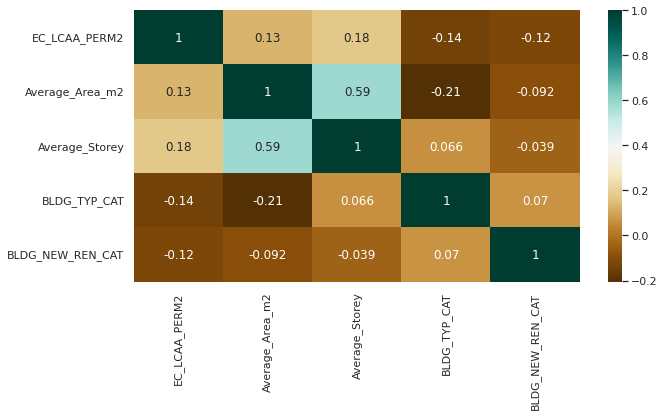

In [159]:
df.corr()
plt.figure(figsize=(10,5))
c= df.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)

# ML Models

sklearn.ensemble.RandomForestRegressor

Test Data Split

In [257]:
features = df.drop(["EC_LCAA_PERM2",'BLDG_TYP','BLDG_US','BLDG_LOC_REGION','BLDG_NEW_REN','BLDG_AREA_M2','BLDG_STOR_A'], axis=1).columns
features

Index(['Average_Area_m2', 'Average_Storey', 'BLDG_TYP_CAT',
       'BLDG_NEW_REN_CAT'],
      dtype='object')

In [258]:
df_train, df_test = train_test_split(df, test_size=0.15)

In [259]:
clf = RandomForestRegressor(n_estimators=20)
clf.fit(df_train[features], df_train["EC_LCAA_PERM2"])

RandomForestRegressor(n_estimators=20)

In [260]:
predictions = clf.predict(df_test[features])

display(predictions)

array([548.6913312 , 344.37368121, 344.37368121, 390.70543829,
       441.48467917, 404.92349549, 127.69134055, 308.61696154,
       344.37368121, 441.48467917, 344.37368121, 390.70543829,
       374.12089951, 351.08855649, 403.58938724, 288.22740633,
       414.89917089, 182.1250066 , 390.70543829, 127.69134055,
       344.37368121, 344.37368121, 202.26536487, 376.54315574,
       288.22740633, 376.54315574, 403.58938724, 447.83928872,
       387.72055979, 387.72055979, 390.70543829, 390.70543829,
       404.92349549, 389.63998063, 426.23690226, 376.54315574,
       376.54315574, 376.54315574, 464.87729897, 447.83928872,
       224.95796667, 416.78837767, 376.54315574, 376.54315574,
       308.61696154, 376.54315574, 224.18759528, 376.54315574,
       344.37368121, 174.94872984, 351.08855649, 404.92349549,
       427.26180029, 376.54315574, 447.83928872, 416.78837767,
       390.70543829, 403.58938724, 288.22740633, 288.22740633,
       224.18759528, 698.53924167, 338.6549487 , 432.90

In [261]:
score = clf.score(df_test[features], df_test["EC_LCAA_PERM2"])
print("Accuracy: ", score)

Accuracy:  0.21971925181663998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


,importance,labels
0,0.507169,Average_Area_m2
1,0.267575,Average_Storey
2,0.159129,BLDG_TYP_CAT
3,0.066128,BLDG_NEW_REN_CAT


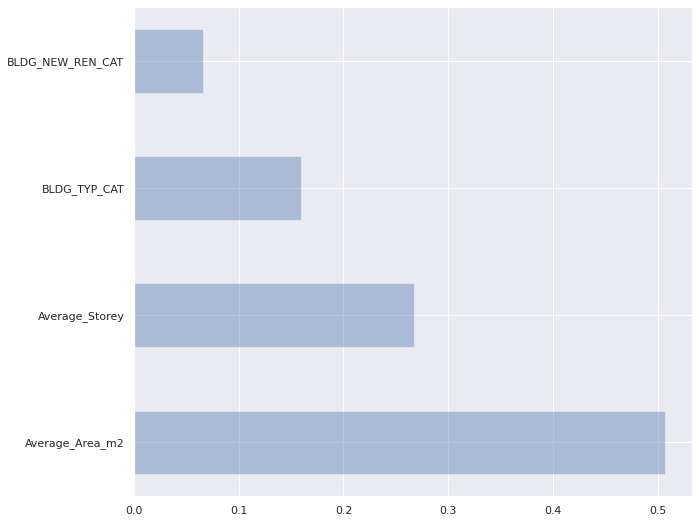

In [262]:
ig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [263]:
r2_score(df_test["EC_LCAA_PERM2"], predictions)

0.21971925181663998

Although the model is not so powerful, we can say that the most important thing in carbon calculation is building area, story number and type of building. 

Let's change features

In [264]:
features2 = df.drop(["EC_LCAA_PERM2",'BLDG_TYP','BLDG_US','BLDG_LOC_REGION','BLDG_NEW_REN','BLDG_AREA_M2','BLDG_STOR_A',"BLDG_NEW_REN_CAT"], axis=1).columns
features2

Index(['Average_Area_m2', 'Average_Storey', 'BLDG_TYP_CAT'], dtype='object')

In [273]:
df_train2, df_test2 = train_test_split(df, test_size=0.15)

In [274]:
clf2 = RandomForestRegressor(n_estimators=20)
clf2.fit(df_train2[features2], df_train2["EC_LCAA_PERM2"])

RandomForestRegressor(n_estimators=20)

In [275]:
predictions2 = clf2.predict(df_test2[features2])

display(predictions2)

array([387.15830077, 331.70279571, 370.37389048, 352.76914367,
       434.63593428, 307.07850893, 468.40213409, 399.3820895 ,
       378.79956434, 354.72187709, 429.8465676 , 363.20109084,
       434.63593428, 421.36552511, 307.07850893, 378.79956434,
       387.15830077, 331.70279571, 370.96368843, 370.37389048,
       352.76914367, 220.61086077, 183.31139918, 342.55014762,
       378.79956434, 387.15830077, 354.72187709, 354.72187709,
       429.8465676 , 468.40213409, 399.3820895 , 326.10363515,
       133.69561111, 547.61867877, 331.70279571, 376.94020238,
       315.5121079 , 352.76914367, 363.20109084, 160.023102  ,
       363.20109084, 710.54852083, 411.58846577, 326.10363515,
       352.76914367, 397.58852238, 220.61086077, 378.79956434,
       434.63593428, 307.07850893, 435.20813929, 250.65573198,
       331.70279571, 354.72187709, 220.61086077, 555.2612619 ,
       352.76914367, 363.20109084, 363.20109084, 370.96368843,
       326.10363515, 370.37389048, 354.72187709, 354.72

In [276]:
score2 = clf2.score(df_test2[features2], df_test2["EC_LCAA_PERM2"])
print("Accuracy: ", score2)

Accuracy:  -0.0716541414513645


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


,importance,labels
0,0.488732,Average_Area_m2
1,0.342297,Average_Storey
2,0.168972,BLDG_TYP_CAT


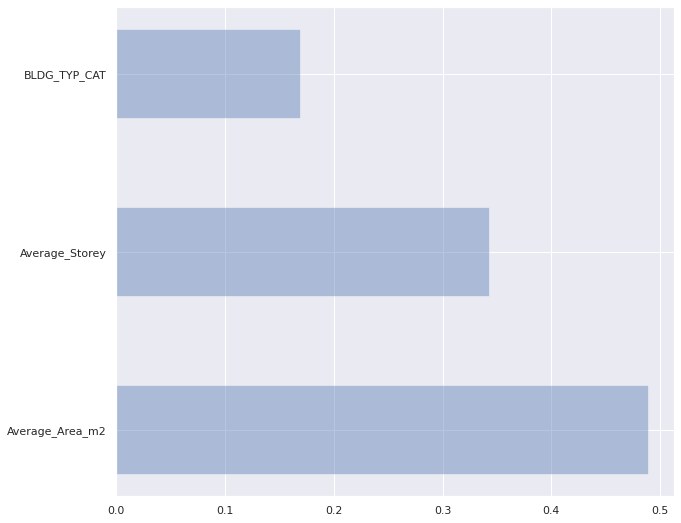

In [277]:
ig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf2.feature_importances_, columns=["importance"])
df_f["labels"] = features2
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf2.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()